In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("dimension of diabetes data: {}".format(data.shape))

NameError: name 'data' is not defined

In [ ]:
df.shape

(768, 9)

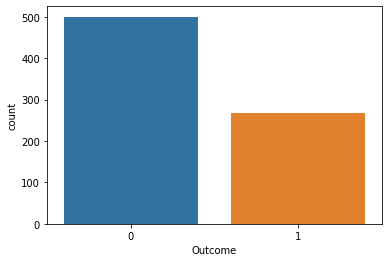

In [ ]:
ax = sns.countplot(x="Outcome", data=df)

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

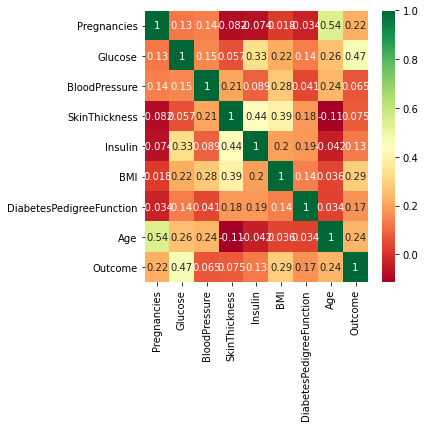

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

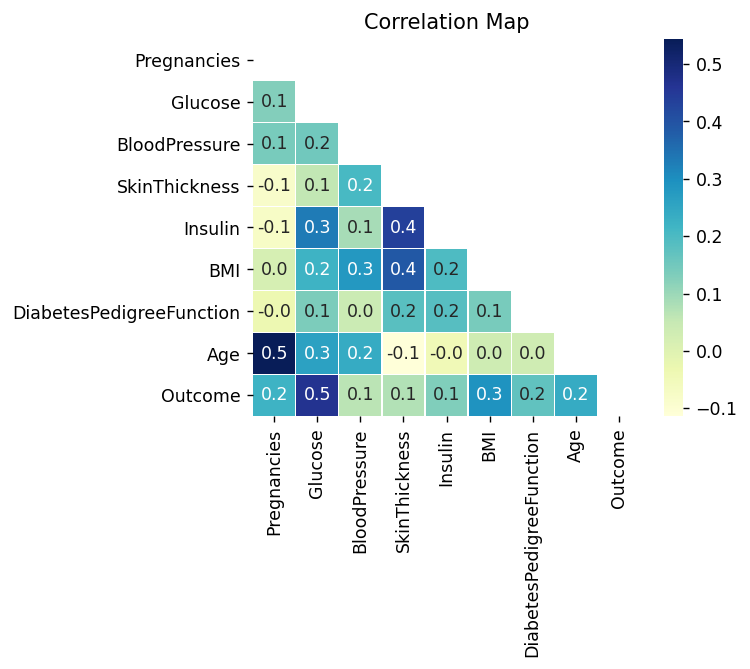

In [ ]:

plt.figure(dpi = 125,figsize= (5,4))
mask = np.triu(df.corr())
sns.heatmap(df.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
plt.title('Correlation Map')
plt.show()

In [ ]:
print('Total zero Glucose values: ' + str(df[df['Glucose']==0].shape[0]))
print('Total zero BloodPressure values: ' + str(df[df['BloodPressure']==0].shape[0]))
print('Total zero SkinThickness values: ' + str(df[df['SkinThickness']==0].shape[0]))
print('Total zero Insulin values: ' + str(df[df['Insulin']==0].shape[0]))
print('Total zero BMI values: ' + str(df[df['BMI']==0].shape[0]))
print('Total zero DiabetesPedigreeFunction values: ' + str(df[df['DiabetesPedigreeFunction']==0].shape[0]))
print('Total zero Age values: ' + str(df[df['Age']==0].shape[0]))

Total zero Glucose values: 5
Total zero BloodPressure values: 35
Total zero SkinThickness values: 227
Total zero Insulin values: 374
Total zero BMI values: 11
Total zero DiabetesPedigreeFunction values: 0
Total zero Age values: 0


In [ ]:
df[df['Glucose']==0]['Outcome'].value_counts()

0    3
1    2
Name: Outcome, dtype: int64

In [ ]:
df[df['BloodPressure']==0]['Outcome'].value_counts()

0    19
1    16
Name: Outcome, dtype: int64

In [ ]:
df[df['SkinThickness']==0]['Outcome'].value_counts()

0    139
1     88
Name: Outcome, dtype: int64

In [ ]:
df[df['Insulin']==0]['Outcome'].value_counts()

0    236
1    138
Name: Outcome, dtype: int64

In [ ]:
df[df['BMI']==0]['Outcome'].value_counts()

0    9
1    2
Name: Outcome, dtype: int64

In [ ]:
def replace_zero(df):
    df_nan = df.copy(deep=True)
    cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
    df_nan[cols] = df_nan[cols].replace({0:np.nan})
    return df_nan

df_nan=replace_zero(df)

In [ ]:
df_nan.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0


In [ ]:
df_nan[df_nan['Glucose'].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


In [ ]:
def find_median(df, col):
    
    df_nondiab = df[df['Outcome']==0].reset_index(drop = True)
    df_diab = df[df['Outcome']==1].reset_index(drop = True)
    return(int(df_nondiab[col].median()), int(df_diab[col].median()))


In [ ]:
find_median(df_nan,'Glucose')

(107, 140)

In [ ]:
df_nan.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
def replace_null(df,var):
    
    median_tuple=find_median(df,var)
    var_0 = median_tuple[0]
    var_1 = median_tuple[1]
    
    df.loc[(df['Outcome'] == 0) & (df[var].isnull()), var] = var_0
    df.loc[(df['Outcome'] == 1) & (df[var].isnull()), var] = var_1
        
    return df[var].isnull().sum()

In [ ]:
replace_null(df_nan, 'Glucose' )

0

In [ ]:
replace_null(df_nan, 'BloodPressure' )

0

In [ ]:
replace_null(df_nan, 'SkinThickness' )

0

In [ ]:
replace_null(df_nan, 'Insulin' )

0

In [ ]:
replace_null(df_nan, 'BMI' )

0

In [ ]:
df_nan.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df_nan.shape

(768, 9)

In [ ]:
df.shape

(768, 9)

In [ ]:
df = df_nan.copy()
column_list = list(df.columns)
column_list

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


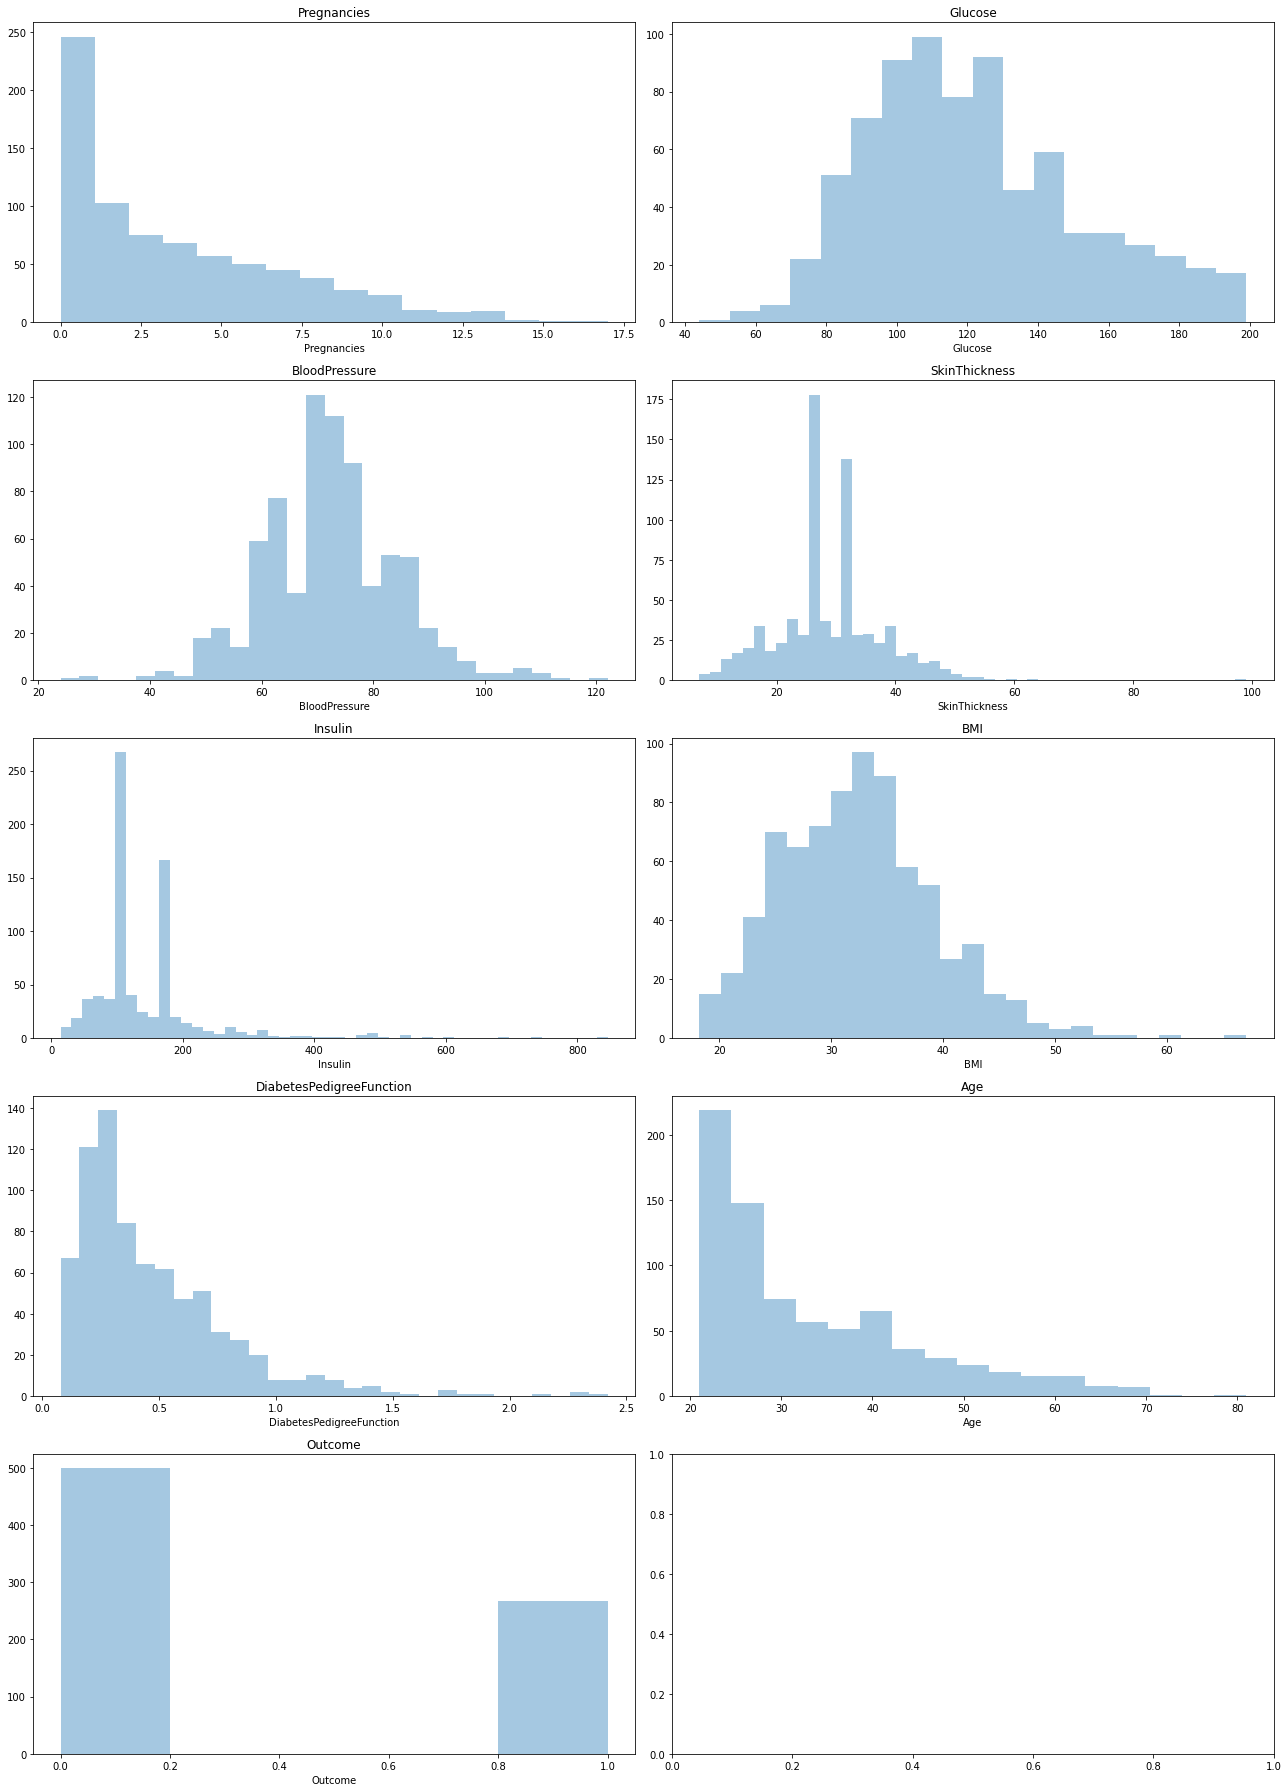

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(18, 25))

for i, subplot in zip(range(9), ax.flatten()):
    
    sns.distplot(df[column_list[i]], hist=True, ax=subplot, norm_hist = False, kde = False)
    subplot.title.set_text(column_list[i])
    plt.tight_layout()
    
plt.show()

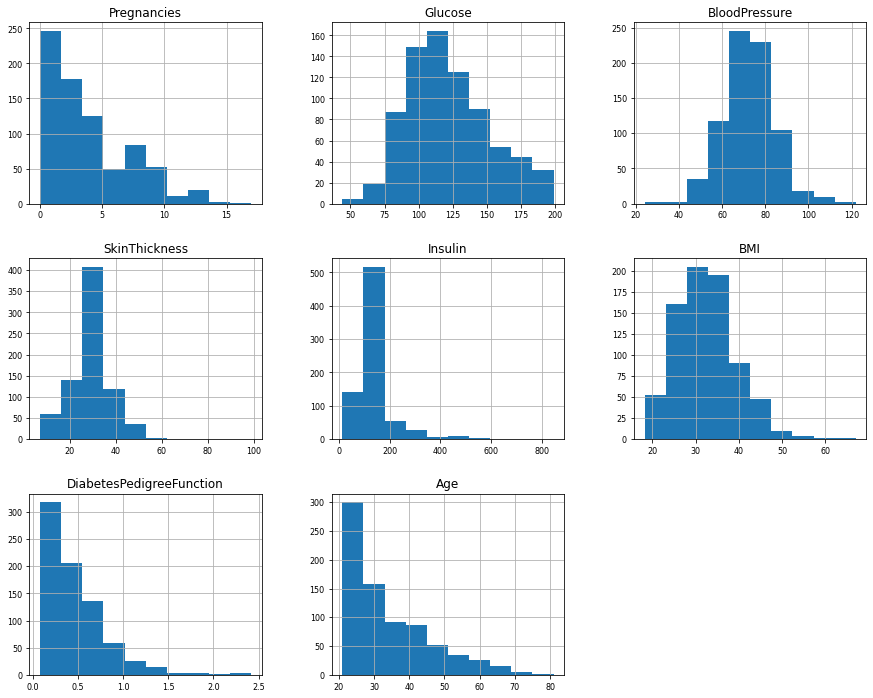

In [ ]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].hist(figsize=(15, 12), bins=10, xlabelsize=8, ylabelsize=8);

In [ ]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0


# Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
predicted_class = ['Outcome']
X = df[feature_columns].values
y = df[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df['Outcome'], random_state=66, test_size = 0.3)

In [ ]:
print(X_test.shape)

(231, 8)


In [ ]:
print(537/(231 + 537) * 100 )

69.921875


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Finding best parameter

In [ ]:
training_accuracy = []
test_accuracy = []
best_traning = 0
best_traning_score = 0
best_test = 0
best_test_score = 0
best_setting_train = 0
best_setting_test = 0

# try n_neighbors from 1 to 10
hidden_layer_settings = range(1, 500)

for nhidden_layer_settings in hidden_layer_settings:
    # build the model
    mlp_kosongan = MLPClassifier(max_iter=1000, alpha=1, random_state=66, hidden_layer_sizes = (nhidden_layer_settings,))
    mlp_kosongan.fit(X_train, y_train.ravel())
    acc_training_score = mlp_kosongan.score(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(mlp_kosongan.score(X_train, y_train))
    # record test set accuracy
    acc_test_score = mlp_kosongan.score(X_test, y_test)
    test_accuracy.append( mlp_kosongan.score(X_test, y_test))
    if acc_training_score > best_traning:
        best_traning = acc_training_score
        best_setting_train = nhidden_layer_settings
    if acc_test_score > best_test:
        best_test = acc_test_score
        best_setting_test = nhidden_layer_settings

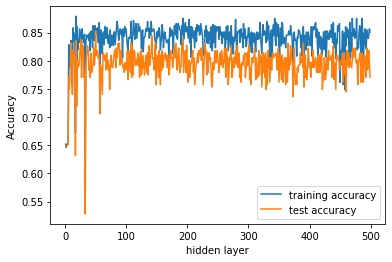

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hidden_layer_settings, training_accuracy, label="training accuracy")
plt.plot(hidden_layer_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("hidden layer")
plt.legend()
plt.savefig('mlp_compare_model')

# Model design

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_kosongan = MLPClassifier(max_iter=1000, alpha=1, random_state=66, hidden_layer_sizes =(57,))
mlp_kosongan.fit(X_train, y_train.ravel())

print("Accuracy on training set: {:.6f}".format(mlp_kosongan.score(X_train, y_train)))
print("Accuracy on test set: {:.6f}".format(mlp_kosongan.score(X_test, y_test)))

Accuracy on training set: 0.746741
Accuracy on test set: 0.705628


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_151 = MLPClassifier(max_iter=300, alpha=1, random_state=66, hidden_layer_sizes =(151,))
mlp_151.fit(X_train, y_train.ravel())

print("Accuracy on training set: {:.6f}".format(mlp_151.score(X_train, y_train)))
print("Accuracy on test set: {:.6f}".format(mlp_151.score(X_test, y_test)))

Accuracy on training set: 0.839851
Accuracy on test set: 0.809524


# Validation

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 150, 1: 81}

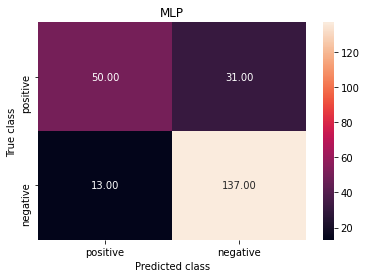

In [ ]:
y_pred = mlp_151.predict(X_test)
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import seaborn as sns
mlp_cm = metrics.confusion_matrix(y_test, y_pred, [1,0])
sns.heatmap(mlp_cm, annot=True, fmt='.2f',xticklabels = ["positive", "negative"] , yticklabels = ["positive", "negative"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('MLP')
plt.savefig('MLP_151')

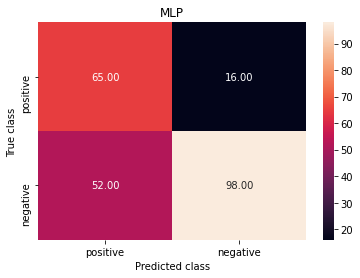

In [ ]:
y_pred = mlp_kosongan.predict(X_test)
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import seaborn as sns
mlp_cm = metrics.confusion_matrix(y_test, y_pred, [1,0])
sns.heatmap(mlp_cm, annot=True, fmt='.2f',xticklabels = ["positive", "negative"] , yticklabels = ["positive", "negative"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('MLP')
plt.savefig('MLP_57')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mlp_kosongan.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74       150
           1       0.56      0.80      0.66        81

    accuracy                           0.71       231
   macro avg       0.71      0.73      0.70       231
weighted avg       0.75      0.71      0.71       231



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mlp_151.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       150
           1       0.79      0.62      0.69        81

    accuracy                           0.81       231
   macro avg       0.80      0.77      0.78       231
weighted avg       0.81      0.81      0.80       231



In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = mlp_kosongan
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X, y.ravel(), cv=kfold, scoring=scoring)
print("MLP : 5-fold cross validation average accuracy: %.3f" % (results.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MLP : 5-fold cross validation average accuracy: 0.790


In [ ]:
scoring = 'precision'
results = model_selection.cross_val_score(modelCV, X, y.ravel(), cv=kfold, scoring=scoring)
print("5-fold cross validation precision precision: %.3f" % (results.mean()))

5-fold cross validation precision precision: 0.700


In [ ]:
scoring = 'recall'
results = model_selection.cross_val_score(modelCV, X, y.ravel(), cv=kfold, scoring=scoring)
print("5-fold cross validation recall recall: %.3f" % (results.mean()))

5-fold cross validation recall recall: 0.699


In [ ]:
scoring = 'f1'
results = model_selection.cross_val_score(modelCV, X, y.ravel(), cv=kfold, scoring=scoring)
print("5-fold cross validation f1-score f1-score: %.3f" % (results.mean()))

5-fold cross validation f1-score f1-score: 0.688


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = mlp_151
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X, y.ravel(), cv=kfold, scoring=scoring)
print("MLP : 5-fold cross validation average accuracy: %.3f" % (results.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NameError: ignored

In [ ]:
scoring = 'precision'
results = model_selection.cross_val_score(modelCV, X, y.ravel(), cv=kfold, scoring=scoring)
print("5-fold cross validation precision precision: %.3f" % (results.mean()))

NameError: ignored

In [ ]:
scoring = 'recall'
results = model_selection.cross_val_score(modelCV, X, y.ravel(), cv=kfold, scoring=scoring)
print("5-fold cross validation recall recall: %.3f" % (results.mean()))

In [ ]:
scoring = 'f1'
results = model_selection.cross_val_score(modelCV, X, y.ravel(), cv=kfold, scoring=scoring)
print("5-fold cross validation f1-score f1-score: %.3f" % (results.mean()))

In [ ]:
X[34]

array([ 10.   , 122.   ,  78.   ,  31.   , 102.5  ,  27.6  ,   0.512,
        45.   ])

In [ ]:
print(y[34])

[0]


In [ ]:
mlp_kosongan.predict([X[2]])

array([0])

In [ ]:
import pickle
pickle.dump(mlp_151, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([X[0]]))
print(y[0])